## Data analysis

#### Imports

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [66]:
PATH_TO_DATA = "../data/"
#columns_tab = ["host_timestamp","x","y","z","in_range","touch","pressure,reset"]
#columns_imu= ["host_timestamp","arduino_timestamp","ax","ay","az","gx","gy","gz","temperature"]

helloworld_imu = pd.read_csv(PATH_TO_DATA + "helloworld_imu.csv", encoding="utf-8")
helloworld_tab = pd.read_csv(PATH_TO_DATA + "helloworld_tab.csv", skiprows=1, encoding="utf-8")

prog_imu = pd.read_csv(PATH_TO_DATA + "programmingisfun_imu.csv", encoding="utf-8")
prog_tab = pd.read_csv(PATH_TO_DATA + "programmingisfun.csv", skiprows=1, encoding="utf-8")

In [67]:
helloworld_tab.head()

,host_timestamp,x,y,z,in_range,touch,pressure,reset
0,306647627961000,-38.0,640.0,0,0,0,0,0
1,306647654043700,-38.0,640.0,0,0,0,0,0
2,306647670572300,-38.0,640.0,0,0,0,0,0
3,306647686501700,-38.0,640.0,0,0,0,0,0
4,306647704636200,-38.0,640.0,0,0,0,0,0


In [68]:
helloworld_imu.head()

,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature
0,306636284024200,104057,-0.5527,-9.0652,4.2006,0.7245,-1.3622,-0.8552,17.95
1,306636295226300,104069,-0.5492,-9.0377,4.2006,2.2248,-4.9798,-1.6945,17.95
2,306636306344800,104080,-0.5408,-9.0748,4.2138,0.7526,-1.9352,-0.4911,17.98
3,306636318217200,104091,-0.5587,-9.0353,4.2018,0.1197,-0.3225,-0.0880,17.98
4,306636329255900,104102,-0.5563,-9.0461,4.2209,0.0208,-0.0623,-0.0305,17.96


In [69]:
print("The length of the imu data set is {} and the length of the tablet data set is {} for the setence 'hello world'".format(helloworld_imu.shape[0], helloworld_tab.shape[0]))
print("The length of the imu data set is {} and the length of the tablet data set is {} for the setence 'programming is fun'".format(prog_imu.shape[0], prog_tab.shape[0]))

The length of the imu data set is 3574 and the length of the tablet data set is 2143 for the setence 'hello world'
The length of the imu data set is 2826 and the length of the tablet data set is 1509 for the setence 'programming is fun'


#### Merge IMU and Tablet data

In [70]:
# use timestamps as keys and for merging
helloworld_imu.set_index('host_timestamp')
helloworld_tab.set_index('host_timestamp')

# use timestamps as keys and for merging
prog_imu.set_index('host_timestamp')
prog_tab.set_index('host_timestamp')

,x,y,z,in_range,touch,pressure,reset
host_timestamp,,,,,,,
45404649771600,-154.000000,756.000000,0,0,0,0,0
45404663545100,-154.000000,756.000000,0,0,0,0,0
45404680888300,-154.000000,756.000000,0,0,0,0,0
45404701255500,-154.000000,756.000000,0,0,0,0,0
45404717798800,-154.000000,756.000000,0,0,0,0,0
...,...,...,...,...,...,...,...
45427632353100,838.534676,76.228885,0,1,1,32319,0
45427648411900,840.819867,79.891051,0,1,1,31871,0
45427664514100,842.167544,83.809567,0,1,1,30271,0


In [71]:
helloworld = pd.merge(helloworld_imu, helloworld_tab, left_index= True, right_index= True)
print(helloworld.head())

prog = pd.merge(prog_imu, prog_tab, left_index= True, right_index= True)

   host_timestamp_x  arduino_timestamp      ax      ay      az      gx  \
0   306636284024200             104057 -0.5527 -9.0652  4.2006  0.7245   
1   306636295226300             104069 -0.5492 -9.0377  4.2006  2.2248   
2   306636306344800             104080 -0.5408 -9.0748  4.2138  0.7526   
3   306636318217200             104091 -0.5587 -9.0353  4.2018  0.1197   
4   306636329255900             104102 -0.5563 -9.0461  4.2209  0.0208   

       gy      gz  temperature  host_timestamp_y     x      y  z  in_range  \
0 -1.3622 -0.8552        17.95   306647627961000 -38.0  640.0  0         0   
1 -4.9798 -1.6945        17.95   306647654043700 -38.0  640.0  0         0   
2 -1.9352 -0.4911        17.98   306647670572300 -38.0  640.0  0         0   
3 -0.3225 -0.0880        17.98   306647686501700 -38.0  640.0  0         0   
4 -0.0623 -0.0305        17.96   306647704636200 -38.0  640.0  0         0   

   touch  pressure  reset  
0      0         0      0  
1      0         0      0  
2 

#### Correct data

In [72]:
# refer to calibrate_imu_idle for these values
ACC_OFFSET = [0.00456531,  0.00791233, -0.02643263]
ACC_SCALE = [0.10216491, 0.10159286, 0.10136561]

GYRO_OFFSET = [-0.019417  ,  0.05761032,  0.03028953]

helloworld[['gx', 'gy', 'gz']] = helloworld[['gx', 'gy', 'gz']] + GYRO_OFFSET

helloworld[['ax', 'ay', 'az']] = helloworld[['ax', 'ay', 'az']] * ACC_SCALE + ACC_OFFSET


helloworld.head()

,host_timestamp_x,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,host_timestamp_y,x,y,z,in_range,touch,pressure,reset
0,306636284024200,104057,-0.051901,-0.913047,0.399364,0.705083,-1.30459,-0.82491,17.95,306647627961000,-38.0,640.0,0,0,0,0,0
1,306636295226300,104069,-0.051544,-0.910253,0.399364,2.205383,-4.92219,-1.66421,17.95,306647654043700,-38.0,640.0,0,0,0,0,0
2,306636306344800,104080,-0.050685,-0.914023,0.400702,0.733183,-1.87759,-0.46081,17.98,306647670572300,-38.0,640.0,0,0,0,0,0
3,306636318217200,104091,-0.052514,-0.910010,0.399485,0.100283,-0.26489,-0.05771,17.98,306647686501700,-38.0,640.0,0,0,0,0,0
4,306636329255900,104102,-0.052269,-0.911107,0.401421,0.001383,-0.00469,-0.00021,17.96,306647704636200,-38.0,640.0,0,0,0,0,0


In [73]:
# refer to calibrate_imu_idle for these values
ACC_OFFSET = [0.00456531,  0.00791233, -0.02643263]
ACC_SCALE = [0.10216491, 0.10159286, 0.10136561]

GYRO_OFFSET = [-0.019417  ,  0.05761032,  0.03028953]

prog[['gx', 'gy', 'gz']] = prog[['gx', 'gy', 'gz']] + GYRO_OFFSET

prog[['ax', 'ay', 'az']] = prog[['ax', 'ay', 'az']] * ACC_SCALE + ACC_OFFSET


prog.head()

,host_timestamp_x,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,host_timestamp_y,x,y,z,in_range,touch,pressure,reset
0,306737983053400,205754,-0.108378,-0.871597,0.680116,-0.434817,0.11011,-0.00391,19.66,45404649771600,-154.0,756.0,0,0,0,0,0
1,306737994348000,205765,-0.132949,-0.862850,0.660836,-0.372517,0.02221,-0.10291,19.66,45404663545100,-154.0,756.0,0,0,0,0,0
2,306738005362700,205776,-0.155313,-0.863826,0.669199,-0.374917,-0.06949,-0.18231,19.66,45404680888300,-154.0,756.0,0,0,0,0,0
3,306738017289300,205788,-0.173161,-0.891530,0.705579,-0.359017,-0.13049,-0.20551,19.66,45404701255500,-154.0,756.0,0,0,0,0,0
4,306738028287000,205799,-0.132826,-0.932736,0.739050,-0.217317,-0.13909,-0.14931,19.66,45404717798800,-154.0,756.0,0,0,0,0,0


In [74]:
# filter out columns where the pen was not in range (in_range != 0)
helloworld = helloworld[helloworld['in_range'] == 1]
prog = prog[prog['in_range'] == 1]
helloworld.head()

,host_timestamp_x,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,host_timestamp_y,x,y,z,in_range,touch,pressure,reset
208,306638627256800,106400,-0.051544,-0.910375,0.411365,0.001383,-0.00349,-0.00021,18.19,306650754067300,1530.578622,10.034333,0,1,0,0,0
209,306638638325900,106412,-0.052024,-0.909644,0.412460,0.001383,-0.00229,-0.00151,18.19,306650773278200,1527.824674,11.718929,0,1,0,0,0
210,306638649467500,106423,-0.051421,-0.910132,0.411487,0.002583,-0.00229,-0.00021,18.17,306650788458900,1522.199588,14.831769,0,1,0,0,0
211,306638660457000,106434,-0.052637,-0.910497,0.411011,0.001383,-0.00349,-0.00021,18.19,306650805100900,1517.219043,17.578393,0,1,0,0,0
212,306638672106400,106445,-0.051176,-0.910253,0.411011,0.001383,-0.00349,-0.00021,18.19,306650821729200,1513.937743,19.519341,0,1,0,0,0


In [76]:
reset_index = helloworld.index[helloworld['reset'] == 1].to_list()[0]
print("Reset at {} in the hello world data set.".format(reset_index))

reset_index = prog.index[prog['reset'] == 1].to_list()
print("Reset at {} in the programming is fun data set.".format(reset_index))
# forgot to use space to end sentence

Reset at 1860 in the hello world data set.
Reset at [] in the programming is fun data set.


In [54]:
# discard indices that come after the reset index
helloworld = helloworld[helloworld.index <= reset_index]
helloworld.shape

(1653, 17)

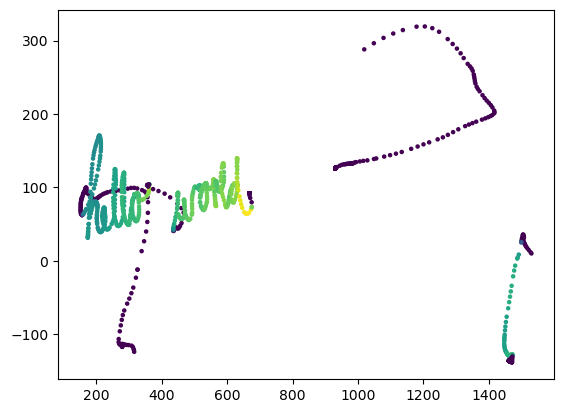

In [81]:
plt.scatter(helloworld.x, helloworld.y, s=5, c=helloworld.pressure)

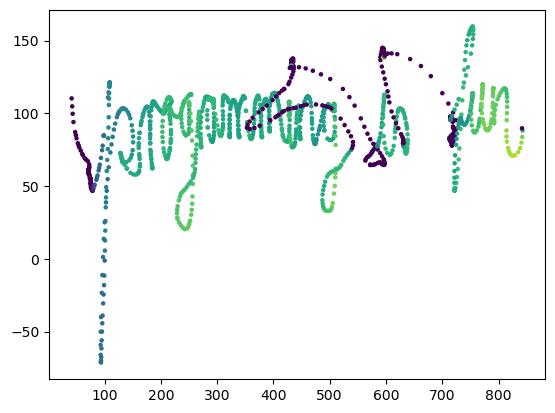

In [82]:
plt.scatter(prog.x, prog.y, s=5, c=prog.pressure)

#### Notes
- which program was terminated first
- how to determine start of writing sequence -> use in_range or space
- space was used to mark end (reset)